# LSI31003 Machine Learning in Molecular Biology Assignment 1

In [1]:
from setup import *
import seaborn as sns
%matplotlib inline

##  Introduction <a id='section1'></a>

Here we will explore a somatic mutation data set from ["Alexandrov LB, et al. (2020) The repertoire of mutational signatures in human cancer. Nature"](https://www.nature.com/articles/s41586-020-1943-3). 

In [2]:

def plot_mutationchannels(sig, name="",names=[]):

    col_set = ['#0343df','#000000','#e50000','#929591','#3f9b0b','#ff81c0']
    col_list = []

    if len(names) != 0:
        n = len(names)
        fig, axes = plt.subplots((len(names) + 2) // 3, 3, figsize=(11, (len(names) + 2) // 3), tight_layout=True)
        axes = axes.flatten()
        
        for idx, name in enumerate(names):
            ax = axes[idx]
            sig1 = sig[name]
            
            # color list set
            color_mult = int(len(sig1)/6)
            for i in range (len(col_set)):
                col_list += [col_set[i]] * color_mult
            
            ax.bar(sig1.index, sig1, width=1, color=col_list)
            ax.set_xticks([])  
            ax.set_title(name, size=12, weight='bold')
            ax.grid(False) 
        for idx in range(len(names), len(axes)):
            axes[idx].set_visible(False)
    else:
        sns.set(rc={"figure.figsize":(11,2.5)})
        sns.set(style="whitegrid", color_codes=True)

        # color list set
        color_mult = int(len(sig)/6)
        for i in range (len(col_set)):
            col_list += [col_set[i]] * color_mult
                
        plt.bar(sig.index, sig, width = 0.5, color = col_list)
        plt.xticks(rotation=90, size = 7, weight='bold')
        plt.title (name, size = 12, weight='bold')
    
        plt.tight_layout()
    plt.show()

### Load mutational catalogs from cancer whole genome sequenced data

Here we will use single base substitution (SBS) data of 2780 cancer genomes from PCAWG project in this assignment. First, let's load the data matrix from the local data folder.

In [3]:
somaticMutations = pd.read_csv ("./data/MutSigCancer/WGS_PCAWG.96.csv")
somaticMutations = somaticMutations.set_index (somaticMutations['Mutation type'] + "_" + somaticMutations['Trinucleotide'])

In [4]:
somaticMutations.head(2)

,Mutation type,Trinucleotide,Biliary-AdenoCA::SP117655,Biliary-AdenoCA::SP117556,Biliary-AdenoCA::SP117627,Biliary-AdenoCA::SP117775,Biliary-AdenoCA::SP117332,Biliary-AdenoCA::SP117712,Biliary-AdenoCA::SP117017,Biliary-AdenoCA::SP117031,...,Uterus-AdenoCA::SP94540,Uterus-AdenoCA::SP95222,Uterus-AdenoCA::SP89389,Uterus-AdenoCA::SP90503,Uterus-AdenoCA::SP92460,Uterus-AdenoCA::SP92931,Uterus-AdenoCA::SP91265,Uterus-AdenoCA::SP89909,Uterus-AdenoCA::SP90629,Uterus-AdenoCA::SP95550
C>A_ACA,C>A,ACA,269,114,105,217,52,192,54,196,...,117,233,94,114,257,139,404,97,250,170
C>A_ACC,C>A,ACC,148,56,71,123,36,139,54,102,...,90,167,59,64,268,75,255,78,188,137


Next we will use the above given function to visualize the data from an individual case:

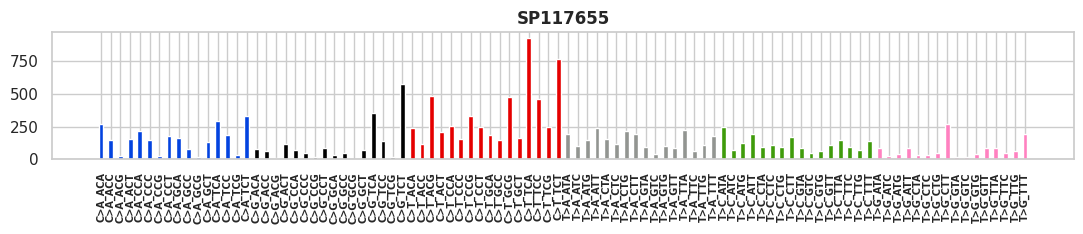

In [5]:
SP117655_profile = somaticMutations['Biliary-AdenoCA::SP117655']
plot_mutationchannels(SP117655_profile,name = "SP117655")

### Load mutational signatures from Alexandrov *et al.'s* paper

There are 65 SBS signatures have been reported based on the paper.

In [6]:
SBS_sig = pd.read_csv("./data/MutSigCancer/SBS_signatures.csv")
SBS_sig = SBS_sig.set_index (SBS_sig['Type'] + "_" + SBS_sig['SubType'])
SBS_sig.head(2)

,Type,SubType,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,...,SBS51,SBS52,SBS53,SBS54,SBS55,SBS56,SBS57,SBS58,SBS59,SBS60
C>A_ACA,C>A,ACA,0.000886,5.800000e-07,0.0208,0.0422,0.01200,0.000425,0.000067,0.002330,...,0.14100,0.01520,0.00538,0.002160,0.00588,0.0126,0.01230,0.05890,0.00359,0.006150
C>A_ACC,C>A,ACC,0.002280,1.480000e-04,0.0165,0.0333,0.00944,0.000524,0.000179,0.000461,...,0.00169,0.00654,0.00196,0.000796,0.00205,0.0157,0.00143,0.00675,0.00237,0.000779


Here is an example of showing the spectrum of the fourth signature, which is found associated with tobacco consuming in lung cancers.

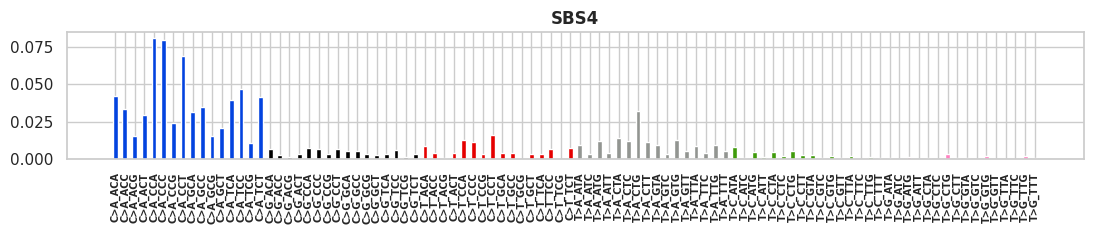

In [7]:
name = 'SBS4'
sig = SBS_sig[name]
plot_mutationchannels(sig, name)

In [8]:
channels6 = list(set(list(SBS_sig['Type'].values)))
channels6

['C>G', 'C>A', 'T>C', 'T>A', 'C>T', 'T>G']

### Problem 1: Explore the data in various ways by visualisation as well as by summary statistics <a id='Problem1'></a>

#### Problem 1a: 
Using the data matrix somaticMutations make a summary plot of total number of mutations per sample per cancer type, see for reference Figure 1 (the top panel) in Alexandrov et al.'s paper. 

**Step 1. Data preprocess**

In [9]:
# extract cancer_type
cancer_types = np.array([s.split("::")[0] for s in somaticMutations.columns[2:]])
somatic_data = somaticMutations.T.drop(['Mutation type', 'Trinucleotide'])

# sum the mutation
somatic_data['total_mutations'] = np.log10(somatic_data.sum(axis=1))
somatic_data['cancer_type'] = cancer_types
somatic_data.head(2)

,C>A_ACA,C>A_ACC,C>A_ACG,C>A_ACT,C>A_CCA,C>A_CCC,C>A_CCG,C>A_CCT,C>A_GCA,C>A_GCC,...,T>G_GTA,T>G_GTC,T>G_GTG,T>G_GTT,T>G_TTA,T>G_TTC,T>G_TTG,T>G_TTT,total_mutations,cancer_type
Biliary-AdenoCA::SP117655,269,148,25,154,215,148,27,180,165,76,...,19,17,43,89,83,48,63,197,4.173186,Biliary-AdenoCA
Biliary-AdenoCA::SP117556,114,56,13,70,63,49,7,69,81,37,...,8,5,20,15,26,10,31,64,3.706547,Biliary-AdenoCA


**Step 2. Rank the cancer types and samples**

In [10]:
# caculate cancer_type Tops
mutations_by_cancer = somatic_data.groupby('cancer_type')['total_mutations'].median().reset_index()
ranked_cancer_types = mutations_by_cancer.sort_values(by='total_mutations', ascending=False).reset_index(drop=True)
ranked_cancer_types.head(2)

,cancer_type,total_mutations
0,Skin-Melanoma,4.850481
1,Lung-SCC,4.627676


In [11]:
# Rank by Tops
cancer_type_ranking = {cancer_type: rank for rank, cancer_type in enumerate(ranked_cancer_types['cancer_type'])}
somatic_data['cancer_type_rank'] = somatic_data['cancer_type'].map(cancer_type_ranking)
sorted_somatic_data = somatic_data.sort_values(by=['cancer_type_rank', 'total_mutations'], ascending=[True, False])

sorted_somatic_data.drop('cancer_type_rank', axis=1, inplace=True)
sorted_somatic_data.head(2)

,C>A_ACA,C>A_ACC,C>A_ACG,C>A_ACT,C>A_CCA,C>A_CCC,C>A_CCG,C>A_CCT,C>A_GCA,C>A_GCC,...,T>G_GTA,T>G_GTC,T>G_GTG,T>G_GTT,T>G_TTA,T>G_TTC,T>G_TTG,T>G_TTT,total_mutations,cancer_type
Skin-Melanoma::SP124415,840,408,47,486,1993,752,280,2084,371,167,...,245,201,539,1251,1319,1250,1035,4120,5.934083,Skin-Melanoma
Skin-Melanoma::SP82445,770,340,56,472,1045,838,259,2993,311,145,...,173,196,405,1430,1053,1325,772,3995,5.871896,Skin-Melanoma


**Step 3. visualization**

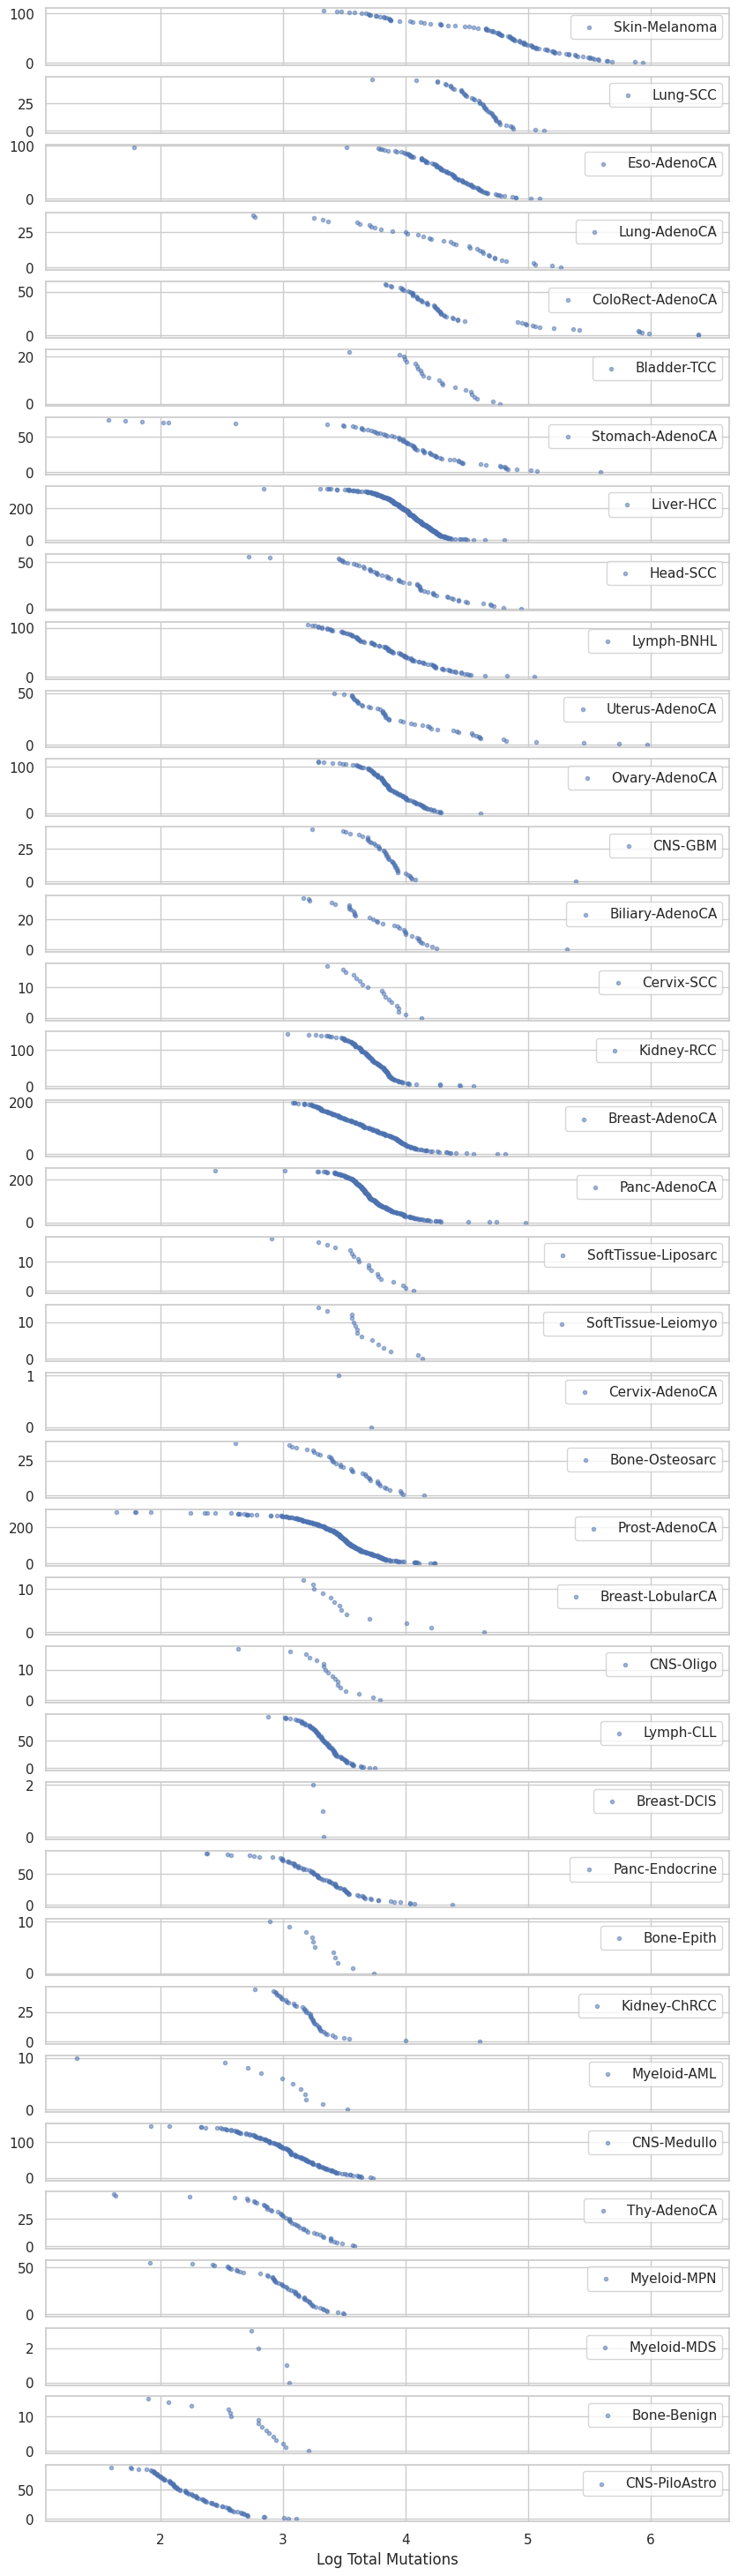

In [12]:
import matplotlib.pyplot as plt

cancer_types = sorted_somatic_data['cancer_type'].unique()

fig, axes = plt.subplots(nrows=len(cancer_types), ncols=1, figsize=(10, len(cancer_types)), sharex=True)

for ax, cancer_type in zip(axes, cancer_types):
    
    data = sorted_somatic_data[sorted_somatic_data['cancer_type'] == cancer_type]
    y = range(len(data))
    ax.scatter(data['total_mutations'], y, label=cancer_type, marker='.',alpha=0.5)
    ax.legend()

axes[-1].set_xlabel('Log Total Mutations')
plt.show()

# TODO 96 channels

#### Problem 1b: 
Visualise the mutational signatures. The data is in variable SBS_sig.

We have given one example in the beginning. More references could be found in mutational signature database ["COSMIC: Signatures of Mutational Processes in Human Cancer"](https://cancer.sanger.ac.uk/cosmic/signatures/SBS/). You could also write your own code and visualize all signatures using it.

65


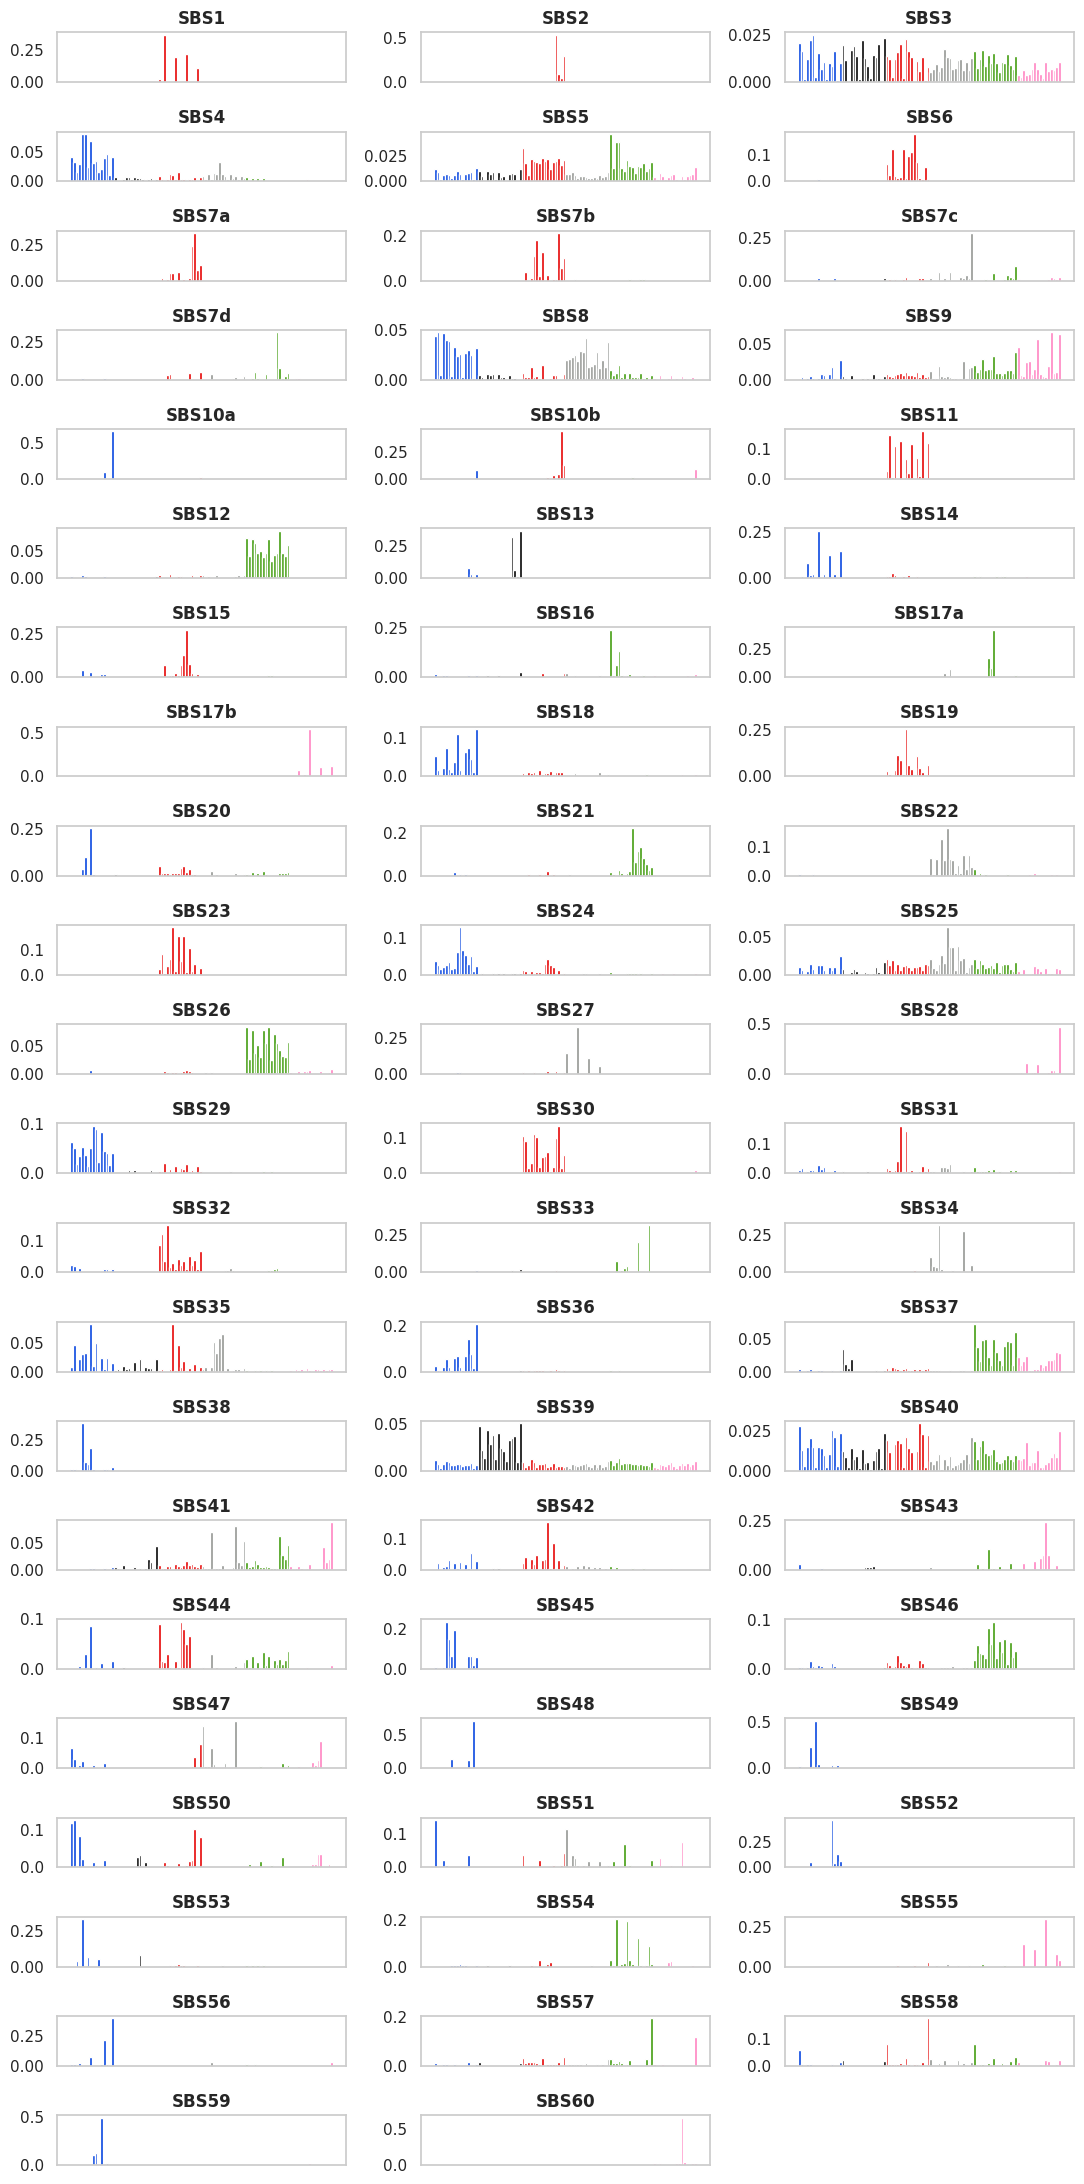

In [13]:
# add parameter in func. plot_mutationchannels
names = SBS_sig.columns[2:]
print(len(names))
plot_mutationchannels(SBS_sig, names=names)

#### Problem 1c: 
First, normalise mutation counts in the 96 channels for each individual sample so that they sum up to 1 to get sample specific mutations densities.  Then form the average of these densities for each cancer type and visualise the averages. 

Make this both at the 96 mutation channel level as well as summing over the context so that only 6 mutational channels remain, (as they are listed in channels6).

Can you see differences between cancer types? Use Figure 3 (and Figure 1 for the 6 channel version) from Alexandrov *et al.* to help look for cancer types that could look different when inspected via such average profiles. 

**Step 1. normalise**

In [14]:
nor_somatic_data = somatic_data.drop(['cancer_type_rank','cancer_type','total_mutations'],axis=1).T
nor_somatic_data = nor_somatic_data / nor_somatic_data.sum()
nor_somatic_data.head(2)

,Biliary-AdenoCA::SP117655,Biliary-AdenoCA::SP117556,Biliary-AdenoCA::SP117627,Biliary-AdenoCA::SP117775,Biliary-AdenoCA::SP117332,Biliary-AdenoCA::SP117712,Biliary-AdenoCA::SP117017,Biliary-AdenoCA::SP117031,Biliary-AdenoCA::SP117759,Biliary-AdenoCA::SP117621,...,Uterus-AdenoCA::SP94540,Uterus-AdenoCA::SP95222,Uterus-AdenoCA::SP89389,Uterus-AdenoCA::SP90503,Uterus-AdenoCA::SP92460,Uterus-AdenoCA::SP92931,Uterus-AdenoCA::SP91265,Uterus-AdenoCA::SP89909,Uterus-AdenoCA::SP90629,Uterus-AdenoCA::SP95550
C>A_ACA,0.018054,0.022406,0.017728,0.017484,0.015046,0.016981,0.008229,0.019663,0.018182,0.013283,...,0.017854,0.015431,0.014457,0.016038,0.009531,0.027912,0.025869,0.005321,0.007185,0.018745
C>A_ACC,0.009933,0.011006,0.011987,0.009911,0.010417,0.012293,0.008229,0.010233,0.01405,0.010098,...,0.013734,0.01106,0.009074,0.009004,0.009939,0.01506,0.016328,0.004279,0.005403,0.015106


**Step 2. visualize the average for each cancer type.**

In [15]:
def vis_df_mutationchannels(data):
    names = data.columns
    print(len(names))
    plot_mutationchannels(data, names=names)

In [16]:
nor_somatic_data = nor_somatic_data.T
nor_somatic_data['cancer_type'] = somatic_data['cancer_type']
grouped_means = nor_somatic_data.groupby('cancer_type').mean().T

37


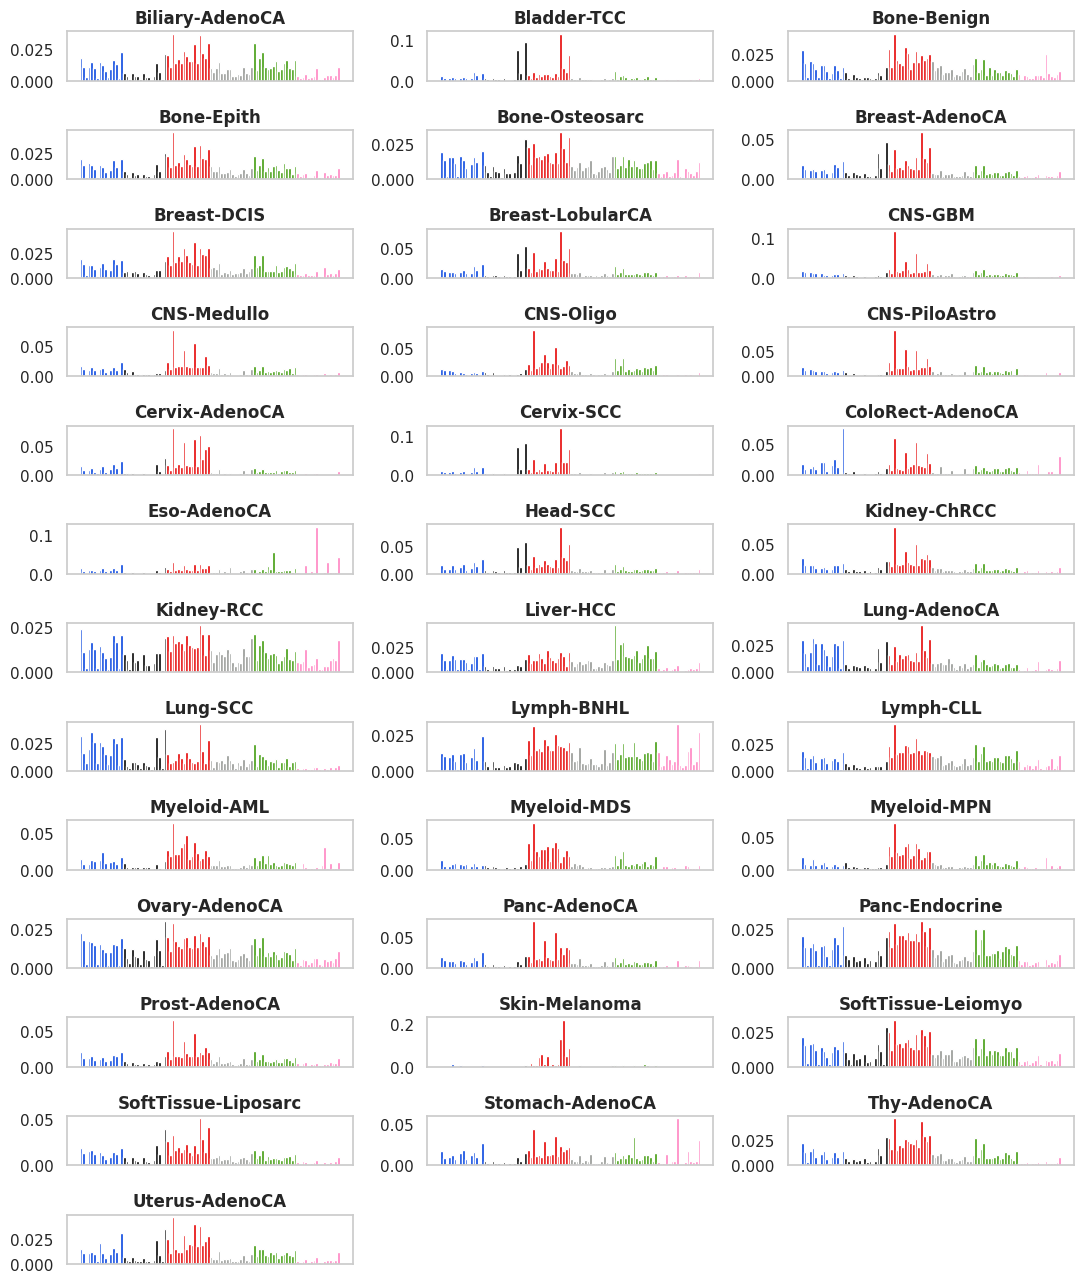

In [17]:
vis_df_mutationchannels(grouped_means)

**Step 3. 96 --> 6**

In [18]:
nor_somatic_data_6 = pd.DataFrame()
for name in nor_somatic_data.columns[:-1]:
    new_column = name.split('_')[0]
    if new_column not in nor_somatic_data_6:
        nor_somatic_data_6[new_column] = nor_somatic_data[name]
    else:
        nor_somatic_data_6[new_column] += nor_somatic_data[name]
# nor_somatic_data_6.T

In [19]:
# nor_somatic_data_6 = nor_somatic_data_6.T
nor_somatic_data_6['cancer_type'] = somatic_data['cancer_type']
grouped_means_6 = nor_somatic_data_6.groupby('cancer_type').mean().T

**Step 4. 6 channels**

37


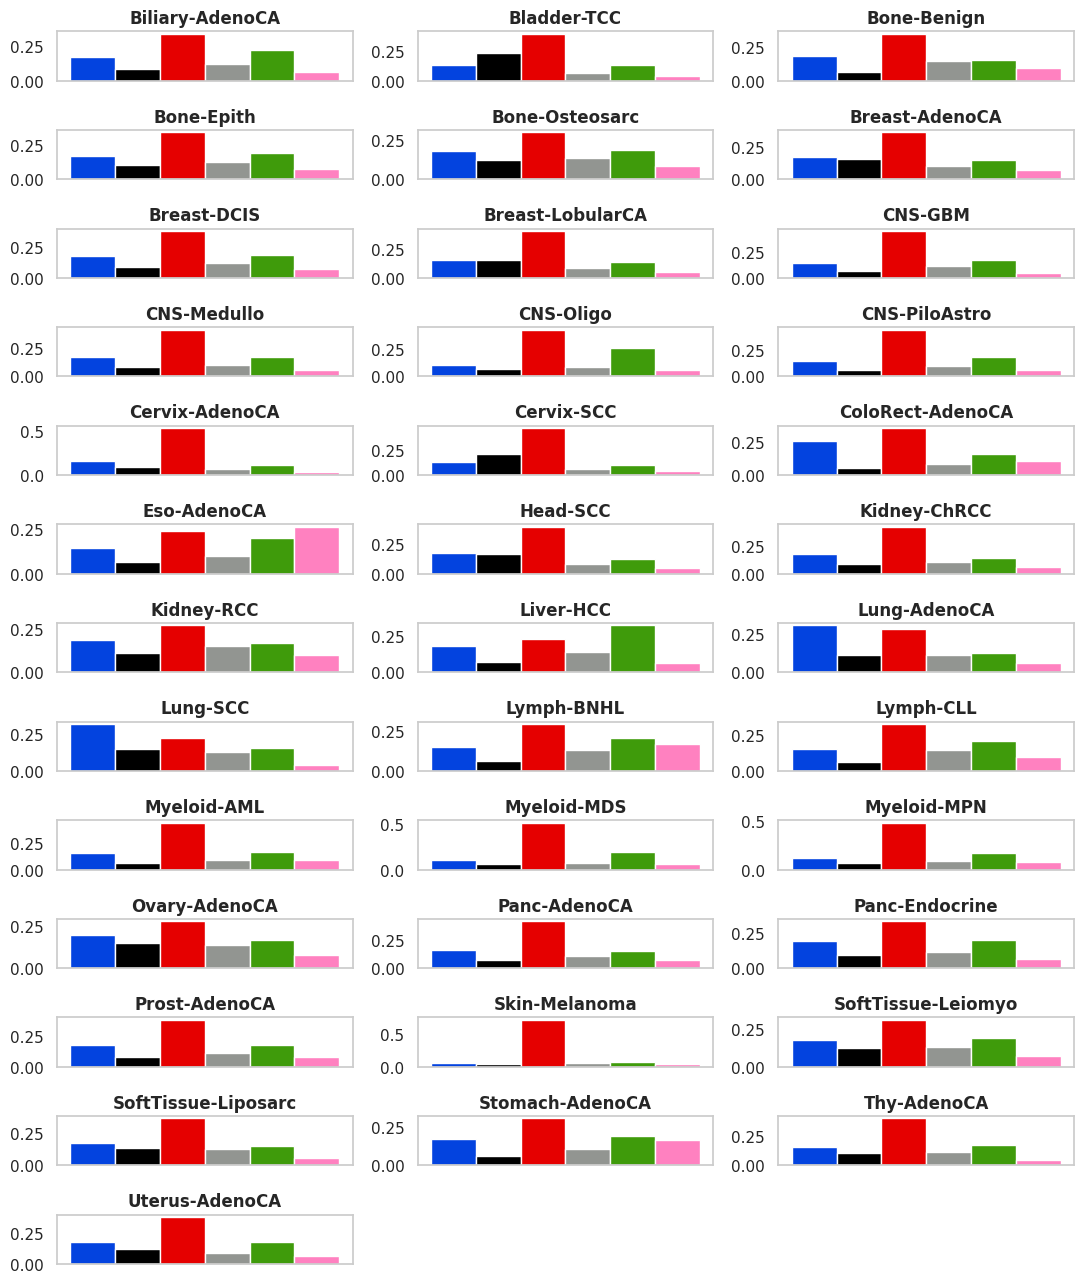

In [20]:
vis_df_mutationchannels(grouped_means_6)

**TODO: Analysis**

#### Problem 1d: 
Study now the signatures given. 

How different are they? 
Make a visualisation of all pairwise distances between the individual signatures. Use at least the following three metrics, **cosine distance, Euclidian distance, Kullback-Leibler divergence**. 

Use for visualisation heatmaps, c.f. Seaborn package, remember to add colour bars with a scale to all heat maps you plot. 

Make **also** figures where you plot all pairwise distances in an ordered way from most similar to least similar. Comment on how the change in the using distance/divergence measure affects this plot.  

In [36]:
signature_matrix = SBS_sig.iloc[:, 2:].values
signature_names = SBS_sig.columns[2:]
signature_matrix

array([[8.86e-04, 5.80e-07, 2.08e-02, ..., 5.89e-02, 3.59e-03, 6.15e-03],
       [2.28e-03, 1.48e-04, 1.65e-02, ..., 6.75e-03, 2.37e-03, 7.79e-04],
       [1.77e-04, 5.23e-05, 1.75e-03, ..., 8.25e-04, 1.42e-04, 2.23e-16],
       ...,
       [5.51e-05, 7.04e-05, 6.28e-03, ..., 1.59e-03, 2.33e-03, 1.06e-02],
       [5.83e-04, 9.54e-05, 8.05e-03, ..., 6.74e-03, 1.96e-03, 2.39e-02],
       [2.23e-16, 2.23e-16, 1.05e-02, ..., 2.17e-02, 1.30e-17, 3.18e-02]])

**Step 1 and 2. caculate and visu**

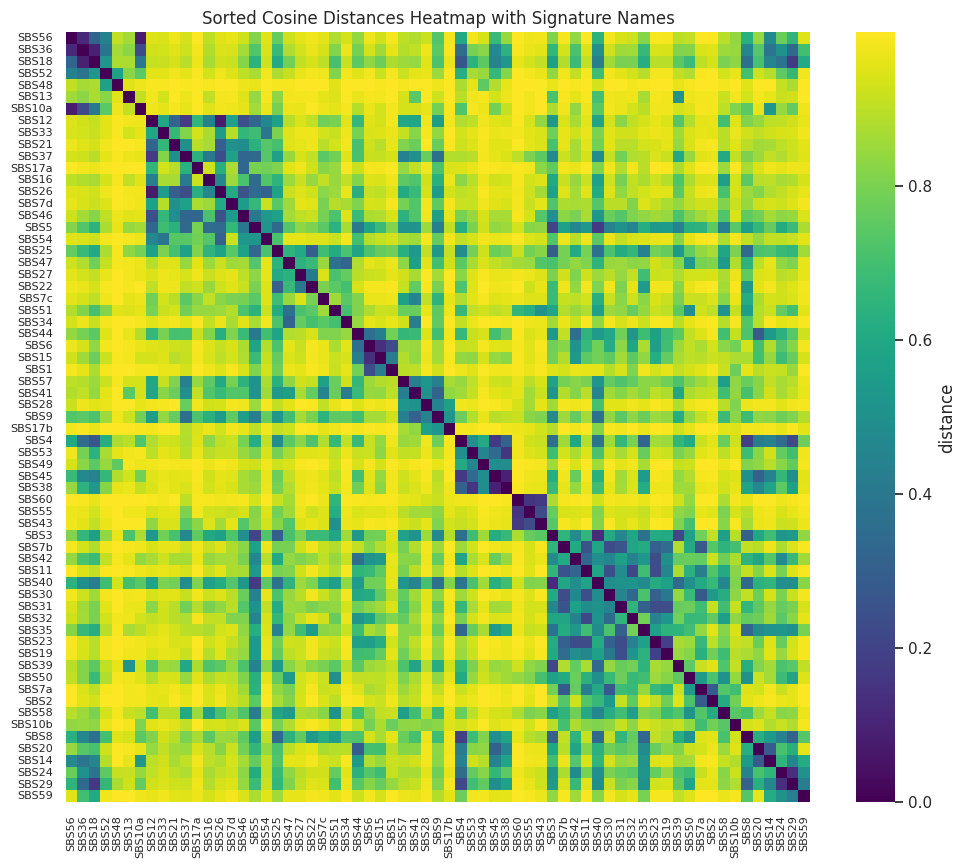

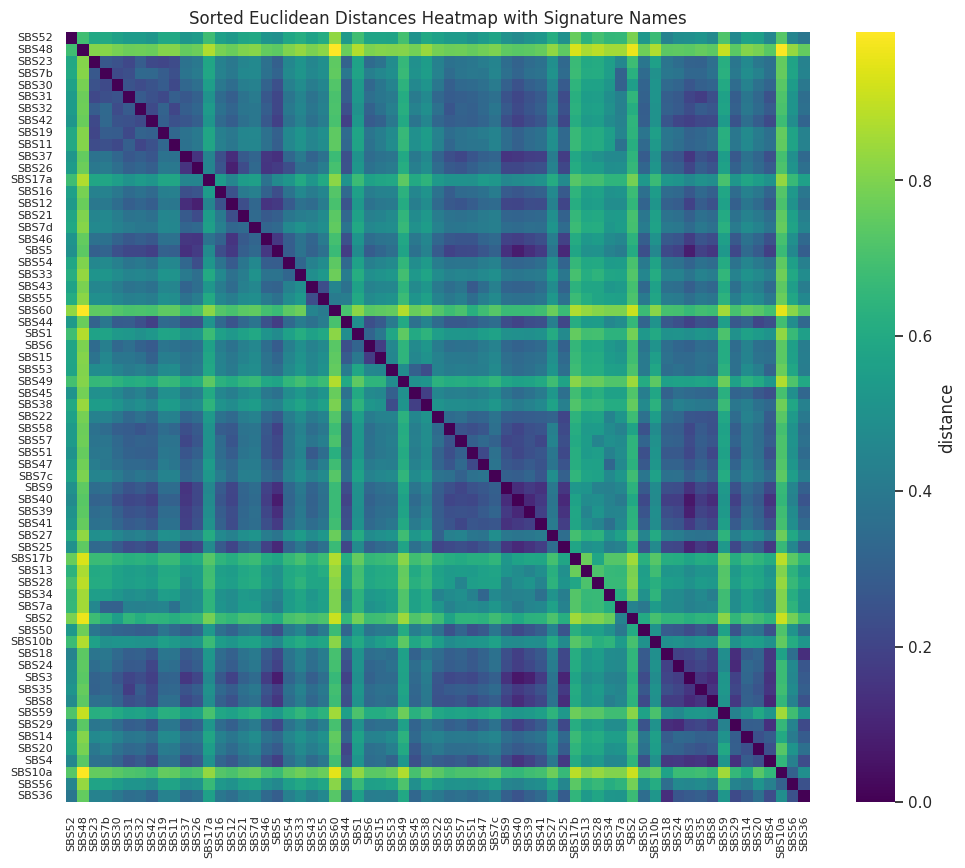

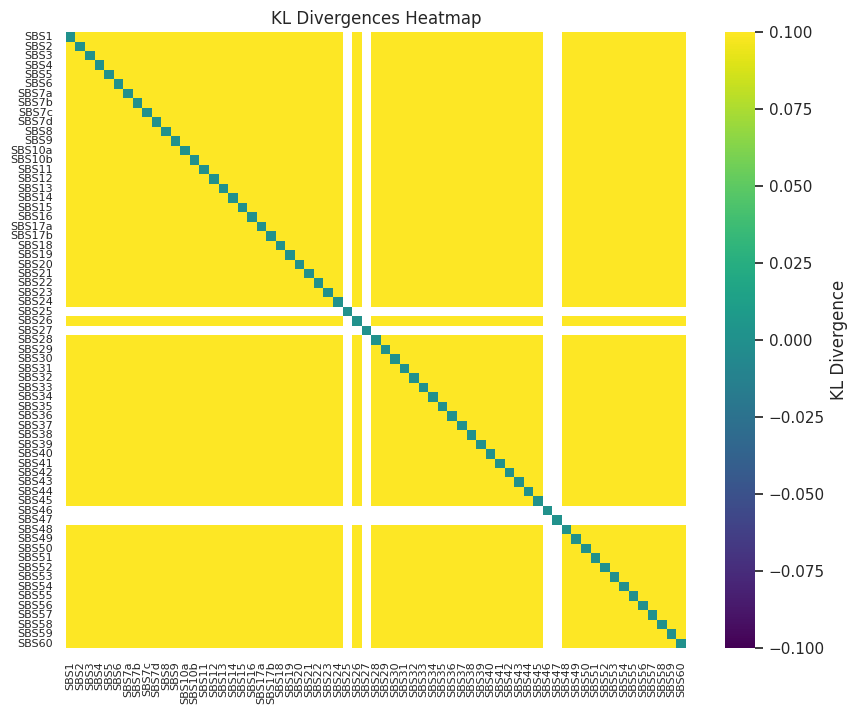

In [22]:
from scipy.spatial.distance import cosine, euclidean
from scipy.stats import entropy
from sklearn.cluster import SpectralClustering

# caculate distance matrix
def calculate_distances(matrix):
    n = matrix.shape[1]
    cosine_dists = np.zeros((n, n))
    euclidean_dists = np.zeros((n, n))
    kl_divs = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i + 1, n):
            p = matrix[:, i]
            q = matrix[:, j]
            cosine_dists[i, j] = cosine_dists[j, i] = cosine(p, q)
            euclidean_dists[i, j] = euclidean_dists[j, i] = euclidean(p, q)
            kl_divs[i, j] = kl_divs[j, i] = (entropy(p, q) + entropy(q, p)) / 2  # Symmetrized KL divergence
    
    return cosine_dists, euclidean_dists, kl_divs

cosine_distances, euclidean_distances, kl_divergences = calculate_distances(signature_matrix)

# rank and cluster
def sort_matrix_by_clustering(dist_matrix):
    sc = SpectralClustering(n_clusters=10, affinity='precomputed', assign_labels='discretize', random_state=42)
    labels = sc.fit_predict(1 - dist_matrix / dist_matrix.max())
    sorted_indices = np.argsort(labels)
    sorted_matrix = dist_matrix[sorted_indices, :][:, sorted_indices]
    return sorted_matrix, sorted_indices

cosine_sorted_matrix, cosine_sorted_indices = sort_matrix_by_clustering(cosine_distances)
euclidean_sorted_matrix, euclidean_sorted_indices = sort_matrix_by_clustering(euclidean_distances)

# draw first 2 hot fig
def plot_heatmap_with_labels(matrix, sorted_indices, title):
    sorted_names = signature_names[sorted_indices]
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, xticklabels=sorted_names, yticklabels=sorted_names, cmap='viridis', cbar_kws={'label': 'distance'})
    plt.title(title)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.show()

plot_heatmap_with_labels(cosine_sorted_matrix, cosine_sorted_indices, 'Sorted Cosine Distances Heatmap with Signature Names')
plot_heatmap_with_labels(euclidean_sorted_matrix, euclidean_sorted_indices, 'Sorted Euclidean Distances Heatmap with Signature Names')

# draw KL
plt.figure(figsize=(10, 8))
sns.heatmap(kl_divergences, xticklabels=signature_names, yticklabels=signature_names, cmap='viridis', cbar_kws={'label': 'KL Divergence'})
plt.title('KL Divergences Heatmap')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.show()

**Step 3. Rank / Top_n pairs**

Input 0 to end.
 top_n =  10


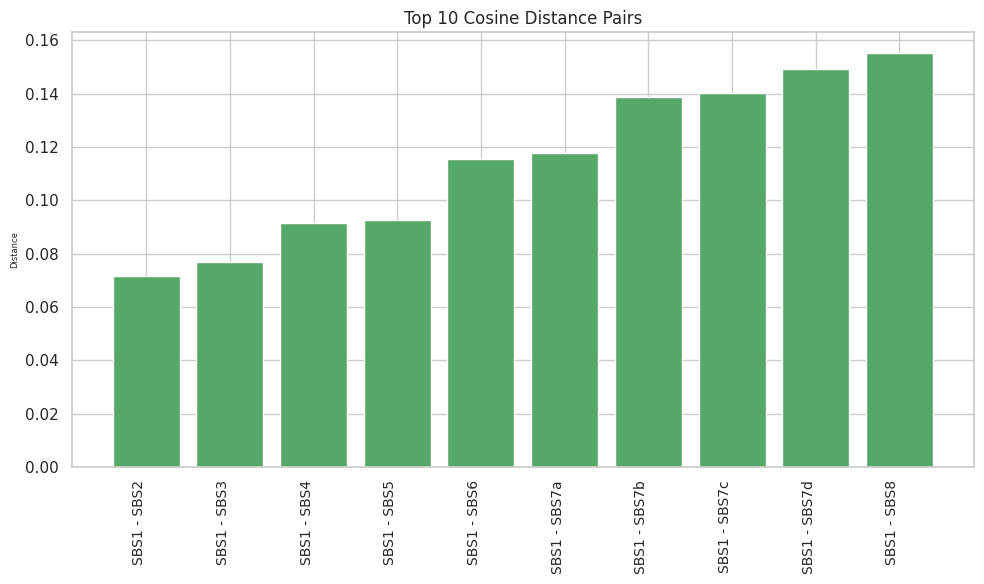

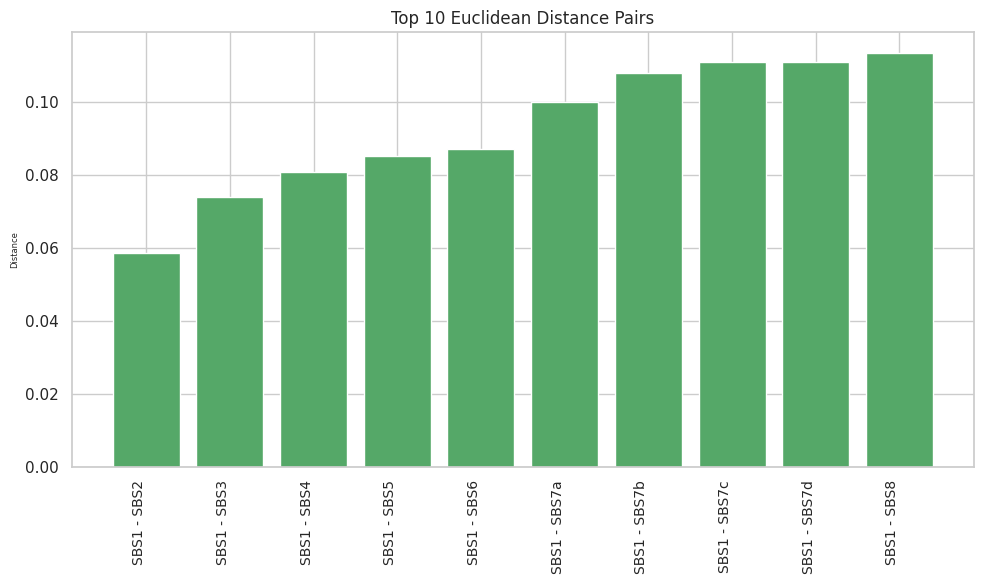

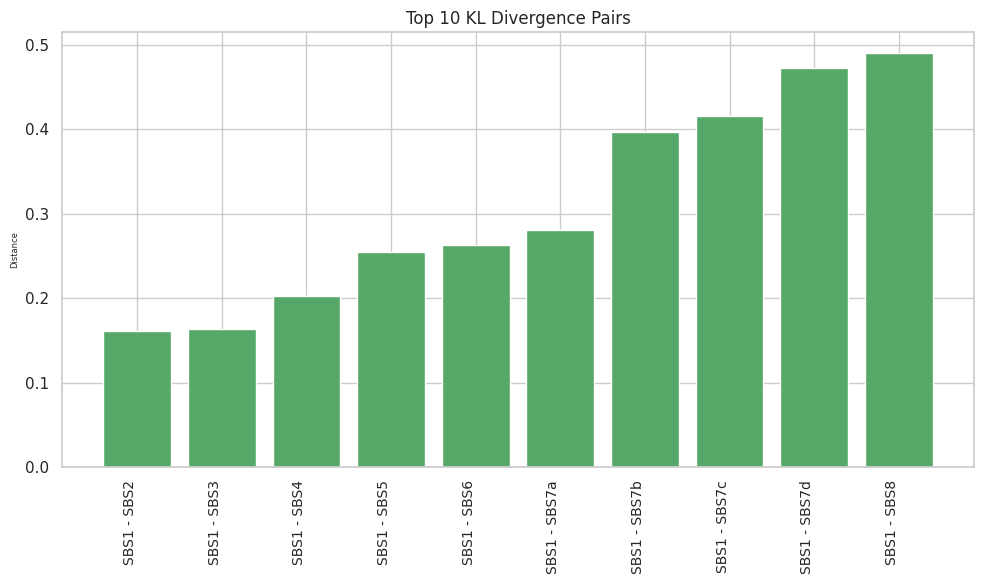

Input 0 to end.
 top_n =  100


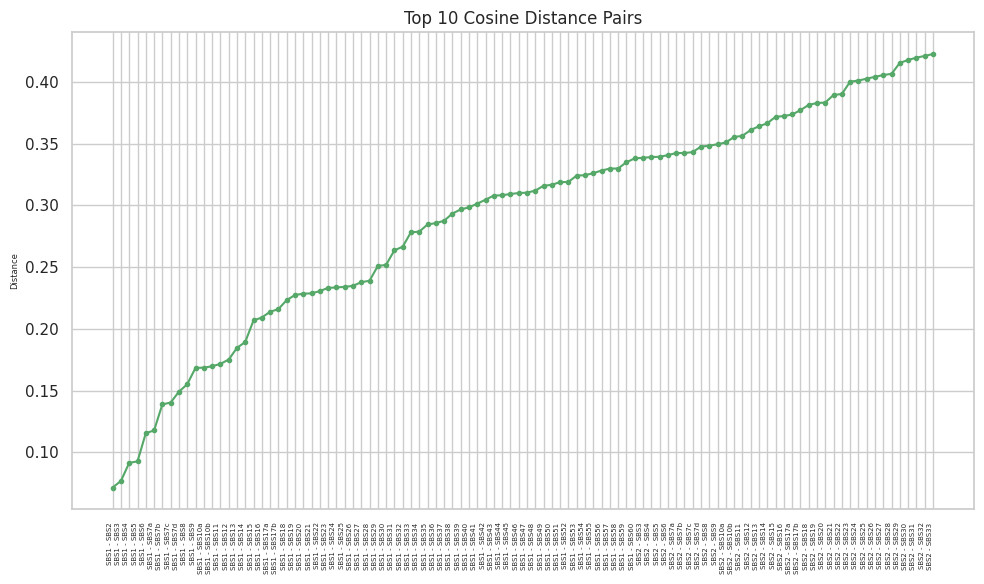

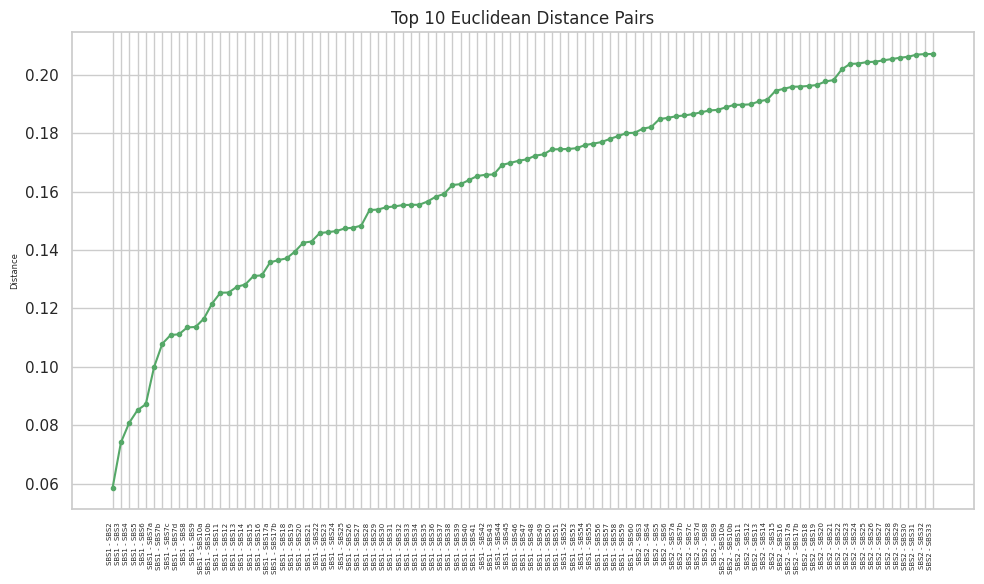

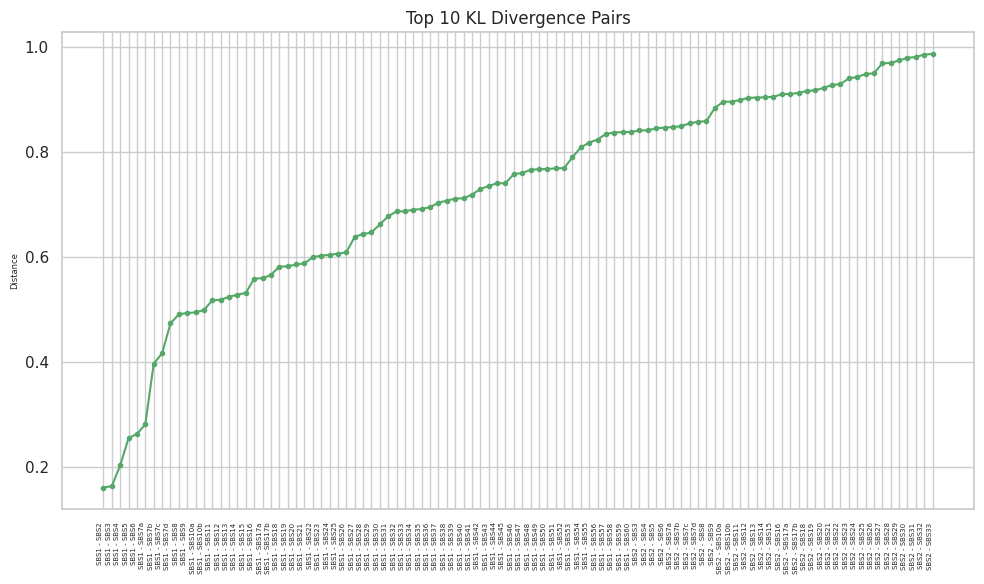

Input 0 to end.
 top_n =  0


In [35]:
top_n = 1000

# 绘制最相似签名对条形图
def get_sorted_distances(dist_matrix):
    distances = dist_matrix[np.triu_indices_from(dist_matrix, k=1)]
    sorted_indices = np.argsort(distances)
    return distances[sorted_indices], sorted_indices

def get_signature_pairs(indices_sorted):
    row_indices, col_indices = np.triu_indices(len(signature_names), k=1)
    signature_pairs = [(signature_names[row_indices[idx]], signature_names[col_indices[idx]]) for idx in indices_sorted]
    return signature_pairs

def plot_top_n_pairs(distances_sorted, signature_pairs, title, top_n=10):
    top_distances = distances_sorted[:top_n]
    top_pairs = signature_pairs[:top_n]
    labels = [f'{pair[0]} - {pair[1]}' for pair in top_pairs]
    positions = range(len(top_distances))
    plt.figure(figsize=(10, 6))
    if top_n <= 20:
        plt.bar(positions, top_distances, tick_label=labels, color='g')
    else:
        plt.plot(positions, top_distances, marker='.', linestyle='-', color='g')
    
    plt.title(title)
    plt.ylabel('Distance', fontsize = 6)
    
    if top_n <= 20:
        plt.xticks(rotation=90, ha="right", fontsize=10/np.log10(top_n))
    else:
        plt.xticks(positions, labels, rotation=90, ha="right", fontsize=10/np.log10(top_n))
    plt.tight_layout()
    plt.show()

cosine_distances_sorted, _ = get_sorted_distances(cosine_distances)
euclidean_distances_sorted, _ = get_sorted_distances(euclidean_distances)
kl_divergences_sorted, _ = get_sorted_distances(kl_divergences)

cosine_signature_pairs = get_signature_pairs(np.argsort(cosine_distances_sorted))
euclidean_signature_pairs = get_signature_pairs(np.argsort(euclidean_distances_sorted))
kl_signature_pairs = get_signature_pairs(np.argsort(kl_divergences_sorted))

top_n = int(input('Input 0 to end.\n top_n = '))
while top_n != 0:
    plot_top_n_pairs(cosine_distances_sorted, cosine_signature_pairs, 'Top 10 Cosine Distance Pairs', top_n)
    plot_top_n_pairs(euclidean_distances_sorted, euclidean_signature_pairs, 'Top 10 Euclidean Distance Pairs', top_n)
    plot_top_n_pairs(kl_divergences_sorted, kl_signature_pairs, 'Top 10 KL Divergence Pairs', top_n)
    top_n = int(input('Input 0 to end.\n top_n = '))

### Problem 2: Generate simulated data <a id='Problem1'></a>

#### Problem 2a: 
Use the real somatic counts as an input to make a function that allows you to simulate data, given an input mutation count profile. 

Use three different noise models: Poisson, Negative Binomial and Gaussian. 

Make a data set for each noise model and use them in your analysis below. 

For now you can use the real counts of a sample as its "model" (we return to this in the second assignment). 

You just need to generate a simulated sample for each real sample using the three different noise models, in effect you re-sample the counts. 

Please note that for both Negative Binomial and Gaussian you also need to define variance (or overdispersion), please try a few different values and see how that affects the figures 2b.   

In [51]:
from scipy.stats import nbinom, norm

# Define a function to add Poisson noise to the dataset
def add_poisson_noise(data):
    simulated_data = data.applymap(lambda x: np.random.poisson(x) if x > 0 else 0)
    return simulated_data

# Define a function to add Negative Binomial noise to the dataset
def add_negative_binomial_noise(data, r= 10, p = 0.5):
    simulated_data = data.applymap(lambda x: nbinom.rvs(r, p) if x > 0 else 0)
    return simulated_data

# Define a function to add Gaussian noise to the dataset
def add_gaussian_noise(data, mu, sigma = 10):
    simulated_data = data.applymap(lambda x: round(norm.rvs(loc=x, scale=sigma)) if x > 0 else 0)
    return simulated_data

In [52]:
wgsp_pcawg_df_simulated_poisson = add_poisson_noise(somaticMutations.drop(columns=["Mutation type", "Trinucleotide"]))
wgsp_pcawg_df_simulated_nb = add_negative_binomial_noise(somaticMutations.drop(columns=["Mutation type", "Trinucleotide"]))
wgsp_pcawg_df_simulated_gaussian = add_gaussian_noise(somaticMutations.drop(columns=["Mutation type", "Trinucleotide"]), somaticMutations.mean())

In [53]:
wgsp_pcawg_df_simulated_poisson.head()

,Biliary-AdenoCA::SP117655,Biliary-AdenoCA::SP117556,Biliary-AdenoCA::SP117627,Biliary-AdenoCA::SP117775,Biliary-AdenoCA::SP117332,Biliary-AdenoCA::SP117712,Biliary-AdenoCA::SP117017,Biliary-AdenoCA::SP117031,Biliary-AdenoCA::SP117759,Biliary-AdenoCA::SP117621,...,Uterus-AdenoCA::SP94540,Uterus-AdenoCA::SP95222,Uterus-AdenoCA::SP89389,Uterus-AdenoCA::SP90503,Uterus-AdenoCA::SP92460,Uterus-AdenoCA::SP92931,Uterus-AdenoCA::SP91265,Uterus-AdenoCA::SP89909,Uterus-AdenoCA::SP90629,Uterus-AdenoCA::SP95550
C>A_ACA,264,109,113,203,44,172,59,241,257,171,...,122,241,94,116,229,141,380,124,264,164
C>A_ACC,128,53,67,106,41,147,56,101,175,118,...,83,181,57,68,248,85,251,81,169,148
C>A_ACG,14,15,7,26,8,36,8,14,14,26,...,11,19,19,22,55,17,47,15,39,32
C>A_ACT,173,59,45,121,32,122,41,124,168,141,...,75,210,67,69,257,69,275,71,194,121
C>A_CCA,211,74,83,113,40,166,54,138,295,119,...,147,215,65,101,324,70,354,221,193,120


#### Problem 2b:
Make a scatter plot of the input counts vs. simulated counts from the model (see for example in lecture slides L1) for each one of the noise models. Use log scale, comment on what you see? 

**Is the noise additive or multiplicative?**

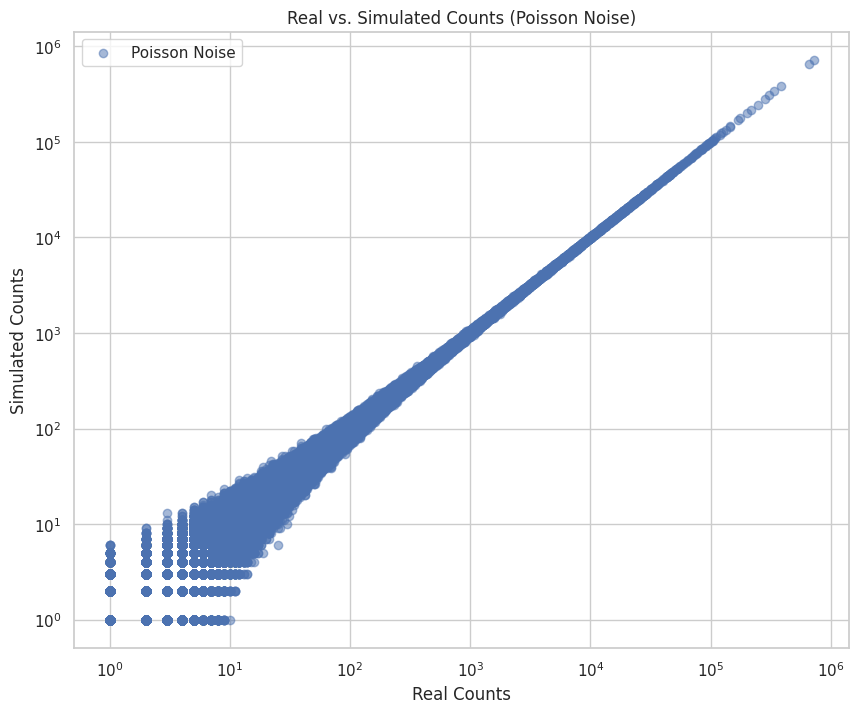

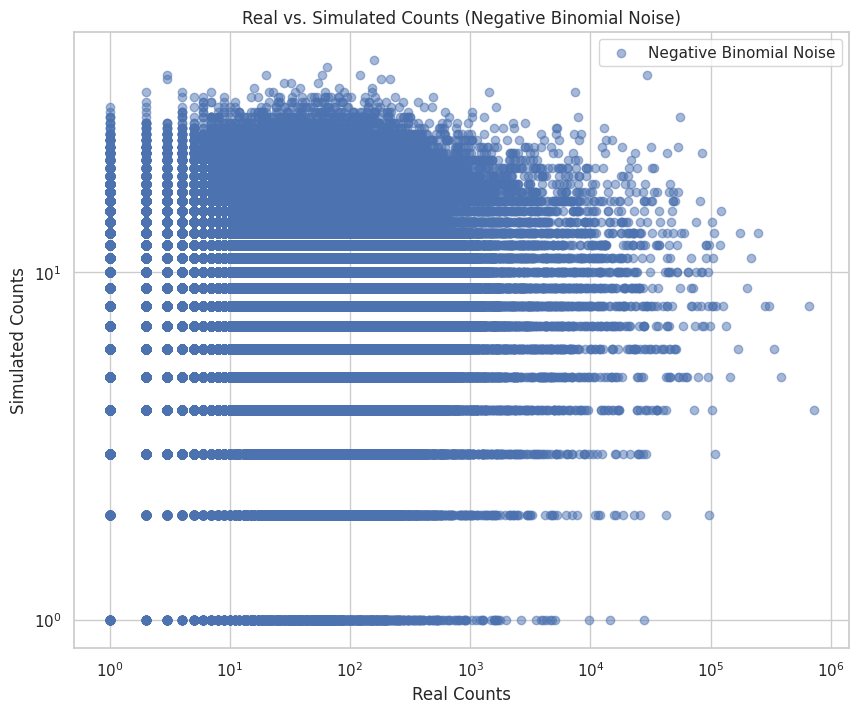

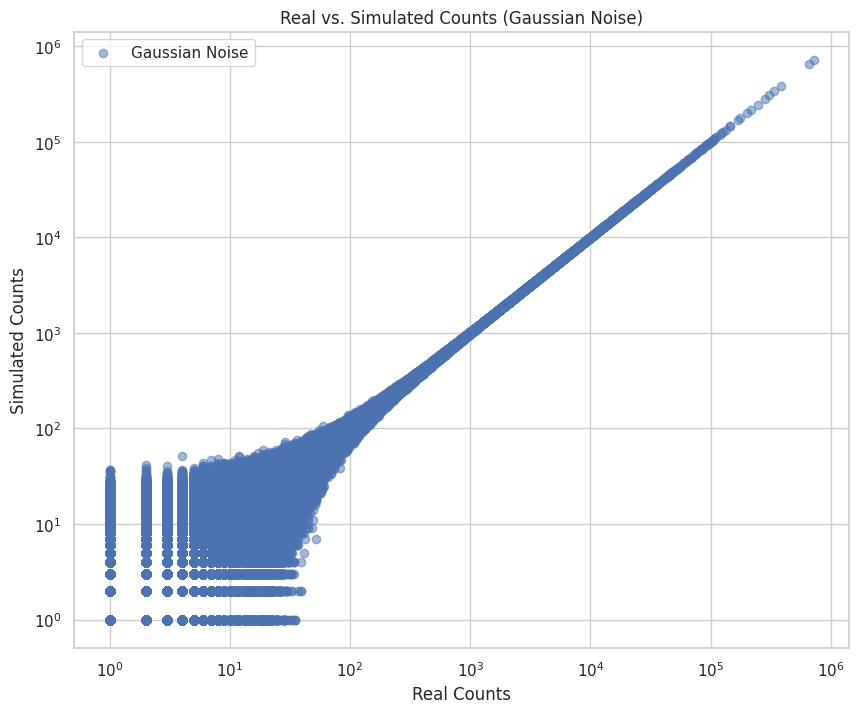

In [55]:
import matplotlib.pyplot as plt

# Define a function to plot the scatter plot for real vs simulated counts
def plot_scatter(real_data, simulated_data, noise_type):
    """
    Plots a scatter plot of the real counts vs simulated counts.

    Parameters:
    real_data (DataFrame): The input data with real counts.
    simulated_data (DataFrame): The data with simulated counts.
    noise_type (str): The type of noise model used for simulation.
    """
    # Flatten the data to get it into a list form for plotting
    real_counts = real_data.to_numpy().flatten()
    simulated_counts = simulated_data.to_numpy().flatten()

    # Create the scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(real_counts, simulated_counts, alpha=0.5, label=f'{noise_type} Noise')
    plt.title(f'Real vs. Simulated Counts ({noise_type} Noise)')
    plt.xlabel('Real Counts')
    plt.ylabel('Simulated Counts')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot for Poisson
plot_scatter(somaticMutations.drop(columns=["Mutation type", "Trinucleotide"]), wgsp_pcawg_df_simulated_poisson, 'Poisson')

# Plot for Negative Binomial
plot_scatter(somaticMutations.drop(columns=["Mutation type", "Trinucleotide"]), wgsp_pcawg_df_simulated_nb, 'Negative Binomial')

# Plot for Gaussian
plot_scatter(somaticMutations.drop(columns=["Mutation type", "Trinucleotide"]), wgsp_pcawg_df_simulated_gaussian, 'Gaussian')
